In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt

DATASET_LOCATION = "../datasets/Full_trace/"

In [14]:
def split_vm_file(list_site_ids):
    for chunk in pd.read_csv(DATASET_LOCATION.rstrip("/") + "/VM_BANDWIDTH.csv",
                                 usecols=["vm_id", "site_id", "pub_down_flow", "pub_up_flow", "pub_down_bw", "pub_up_bw", "report_ts"],
                             chunksize=1000000,
                             dtype={"vm_id": str,
                                    "site_id": str,
                                    "pub_down_flow": np.int64,
                                    "pub_up_flow": np.int64,
                                    "pub_down_bw": np.int64,
                                    "pub_up_bw": np.int64,
                                    "report_ts": str}
                             ):
        df_by_from_site_id = chunk.groupby("site_id")
        for (each_site_id, each_site_id_df) in df_by_from_site_id:
            if each_site_id in list_site_ids:
                filename = "../datasets/" + "/split-vm-files/{}.csv".format(each_site_id)
                each_site_id_df.to_csv(filename, mode='a', header=not os.path.exists(filename))
            

In [16]:
region_ids = ['shanghai-telecom-2', 'wuxi-telecom-2', 'suzhou-telecom-2', 'wuhan-telecom-3', 'xiamen-telecom_unicom_cmcc', 'jinan-telecom', 'wuhu-telecom', 'qingdao-telecom', 'wenzhou-telecom', 'hangzhou-telecom']
split_vm_file(region_ids)

In [7]:
def split_city_file(list_city):
    for chunk in pd.read_csv(DATASET_LOCATION.rstrip("/") + "/VM_BANDWIDTH.csv",
                                 usecols=["vm_id", "site_id", "pub_down_flow", "pub_up_flow", "pub_down_bw", "pub_up_bw", "report_ts"],
                             chunksize=1000000,
                             dtype={"vm_id": str,
                                    "site_id": str,
                                    "pub_down_flow": np.int64,
                                    "pub_up_flow": np.int64,
                                    "pub_down_bw": np.int64,
                                    "pub_up_bw": np.int64,
                                    "report_ts": str}
                             ):

        for city in list_city:
            city_filtered = chunk[chunk['site_id'].str.startswith(city)]
            if not city_filtered.empty:
                filename = "../datasets/" + "/split-vm-files/split-city/{}.csv".format(city)
                city_filtered.to_csv(filename, mode='a', header=not os.path.exists(filename))
                
            

In [8]:
list_city = ['shanghai', 'wuxi', 'suzhou', 'wuhan', 'xiamen', 'jinan', 'wuhu', 'qingdao', 'wenzhou', 'hangzhou']
split_city_file(list_city)

In [25]:
# extract clean data from #split-vm-files
region_ids = ['shanghai-telecom-2', 'wuxi-telecom-2', 'suzhou-telecom-2', 'wuhan-telecom-3', 'xiamen-telecom_unicom_cmcc', 'jinan-telecom', 'wuhu-telecom', 'qingdao-telecom', 'wenzhou-telecom', 'hangzhou-telecom']

for region_id in region_ids: 
    df_test = pd.read_csv("../datasets/".rstrip("/") + "/split-vm-files/{}.csv".format(region_id))
    
    df_test["real_time"] = pd.to_datetime(df_test["report_ts"], unit='s', utc=True)
    df_test = df_test.sort_values(by="real_time")
    df_test.to_csv("../datasets/".rstrip("/") + "/split-vm-files/cleandata/{}.csv".format(region_id), index = False)
    
        

In [9]:
# extract clean data from #split-city
list_city = ['shanghai', 'wuxi', 'suzhou', 'wuhan', 'xiamen', 'jinan', 'wuhu', 'qingdao', 'wenzhou', 'hangzhou']

for city in list_city: 
    df_test = pd.read_csv("../datasets/".rstrip("/") + "/split-vm-files/split-city/{}.csv".format(city))
    
    df_test["real_time"] = pd.to_datetime(df_test["report_ts"], unit='s', utc=True)
    df_test = df_test.sort_values(by="real_time")
    df_test.to_csv("../datasets/".rstrip("/") + "/split-vm-files/split-city/cleandata/{}.csv".format(city), index = False)
    
        

In [33]:
# print unique vm_ids in each region
unique_vm_ids = {}
region_ids = ['shanghai-telecom-2', 'wuxi-telecom-2', 'suzhou-telecom-2', 'wuhan-telecom-3', 'xiamen-telecom_unicom_cmcc', 'jinan-telecom', 'wuhu-telecom', 'qingdao-telecom', 'wenzhou-telecom', 'hangzhou-telecom']
for region_id in region_ids: 
    df_test = pd.read_csv("../datasets/".rstrip("/") + "/split-vm-files/{}.csv".format(region_id))

    vm_id_number = df_test["vm_id"].unique()
    unique_vm_ids[region_id] = vm_id_number
    print("{} has {} different vm_ids:".format(region_id, len(vm_id_number)))

print(unique_vm_ids)

shanghai-telecom-2 has 19 different vm_ids:
wuxi-telecom-2 has 27 different vm_ids:
suzhou-telecom-2 has 109 different vm_ids:
wuhan-telecom-3 has 42 different vm_ids:
xiamen-telecom_unicom_cmcc has 66 different vm_ids:
jinan-telecom has 56 different vm_ids:
wuhu-telecom has 64 different vm_ids:
qingdao-telecom has 104 different vm_ids:
wenzhou-telecom has 23 different vm_ids:
hangzhou-telecom has 54 different vm_ids:
{'shanghai-telecom-2': array(['04438445f1d3714744f1316c053ebfe9',
       '53d228143f1aae9253b9fc9b78d6cc33',
       '93de7ec8b8231a1f039ed4eaeff23c0e',
       'e959e39175b95330a51ffb50a279b371',
       '311df5072cca0bb76a97424f24d1fb49',
       'cabacfc294ba5d85e00a5d1c5aea92c8',
       'ef2a368258205af67d1cd1f0ada05501',
       'ea306b03159c6d2faeae73b08febb134',
       '3e9b1fd51e8c5cd1083cee7a67711cc4',
       'effc740f3fb0985183bcccb76005c486',
       '857b568dba2d3b1f695976a568768183',
       '1ced5e47410c18ac003051c14c6be8eb',
       '0cc3a69836c4bc2d810df818da8c3eb

In [21]:
# print unique vm_ids in each city
unique_vm_ids = {}
list_city = ['shanghai', 'wuxi', 'suzhou', 'wuhan', 'xiamen', 'jinan', 'wuhu', 'qingdao', 'wenzhou', 'hangzhou']

for city in list_city: 
    df_test = pd.read_csv("../datasets/".rstrip("/") + "/split-vm-files/split-city/{}.csv".format(city))

    vm_id_number = df_test["vm_id"].unique()
    unique_vm_ids[city] = vm_id_number
    print("{} has {} different vm_ids:".format(city, len(vm_id_number)))

print(unique_vm_ids)

shanghai has 596 different vm_ids:
wuxi has 146 different vm_ids:
suzhou has 193 different vm_ids:
wuhan has 433 different vm_ids:
xiamen has 153 different vm_ids:
jinan has 177 different vm_ids:
wuhu has 101 different vm_ids:
qingdao has 228 different vm_ids:
wenzhou has 23 different vm_ids:
hangzhou has 145 different vm_ids:
{'shanghai': array(['8c3f09d8ceb9c8e4c6804efcd2aef345',
       '92436927daf5c7535c3a4c066186d5e2',
       'cb68bf3be362a806975fbcfbe050669d',
       '7eac7c4f1986d2e34c20a9b25e79fc26',
       'e54656e2f14a1c116fb0c9b08b4e9fca',
       '20cb98eff4faf1e1b9c2567e6349a19d',
       '79cc9a1948b3666aebcb0a1a925ffbf0',
       'f9091f672e460405fccff98f5f9af39b',
       '46c7a70bfc28fd42fc4d29eaf6d4b04a',
       '062f32202b4d06a9887e7f02fd96a6fa',
       'a0a299d02f69e40c19367a8cb0f28466',
       'b971039aa9a72dc515f527badf276a48',
       '12b123618eefd0c77d3f7eeacea6686c',
       'dc5e92671e6d7255089cd94e16d9d04c',
       'b0476daa8404570fcd29dd3adeb27ca4',
       'fbb39

In [41]:
df_test_1 = pd.read_csv("../datasets/".rstrip("/") + "/split-vm-files/cleandata/jinan-telecom.csv")
df_test_2 = pd.read_csv("../datasets/".rstrip("/") + "/split-vm-files/cleandata/wuxi-telecom-2.csv")
time_1 = df_test_1["real_time"].unique()
time_2 = df_test_2["real_time"].unique()
difference_1_to_2 = set(time_2) - set(time_1)
print(difference_1_to_2)




{'2020-06-10 01:20:00+00:00', '2020-06-10 03:10:00+00:00', '2020-06-10 02:45:00+00:00', '2020-06-10 03:25:00+00:00', '2020-06-10 00:30:00+00:00', '2020-06-10 03:20:00+00:00', '2020-06-10 01:40:00+00:00', '2020-06-10 02:05:00+00:00', '2020-06-10 02:15:00+00:00', '2020-06-10 02:20:00+00:00', '2020-06-10 03:05:00+00:00', '2020-06-10 01:55:00+00:00', '2020-06-10 01:10:00+00:00', '2020-06-10 02:10:00+00:00', '2020-06-10 01:35:00+00:00', '2020-06-10 01:50:00+00:00', '2020-06-10 02:35:00+00:00', '2020-06-10 03:30:00+00:00', '2020-06-10 02:55:00+00:00', '2020-06-10 01:25:00+00:00'}


In [47]:
# calculate the bandwidth usage in a specific time span for each region
time_span = 5
region_ids = ['shanghai-telecom-2', 'wuxi-telecom-2', 'suzhou-telecom-2', 'wuhan-telecom-3', 'xiamen-telecom_unicom_cmcc', 'jinan-telecom', 'wuhu-telecom', 'qingdao-telecom', 'wenzhou-telecom', 'hangzhou-telecom']

for region_id in region_ids: 
    df_test = pd.read_csv("../datasets/".rstrip("/") + "/split-vm-files/cleandata/{}.csv".format(region_id))
    if time_span == 5: 
        #sum_downlink_each_timespan = df_test.groupby("real_time")["pub_down_bw"].sum()
        sum_uplink_each_timespan = df_test.groupby("real_time")["pub_up_bw"].sum().reset_index()
        #print(region_id, sum_downlink_each_timespan)
        print(region_id, sum_uplink_each_timespan)
        sum_uplink_each_timespan.to_csv("../datasets/".rstrip("/") + "/split-vm-files/cleandata/bandwidthup_{}.csv".format(region_id), index = False)

    elif time_span == 10:
        pass
    elif time_span == 15:
        pass
    elif time_spac == 20:
        pass
    elif time_span == 25:
        pass
    elif time_span == 30:
        pass


shanghai-telecom-2                       real_time  pub_up_bw
0     2020-05-31 16:00:00+00:00  285447425
1     2020-05-31 16:05:00+00:00  266488190
2     2020-05-31 16:10:00+00:00  253434140
3     2020-05-31 16:15:00+00:00  242952861
4     2020-05-31 16:20:00+00:00  240342389
...                         ...        ...
8634  2020-06-30 15:35:00+00:00  401163366
8635  2020-06-30 15:40:00+00:00  393235419
8636  2020-06-30 15:45:00+00:00  385656314
8637  2020-06-30 15:50:00+00:00  332959889
8638  2020-06-30 15:55:00+00:00  317868444

[8639 rows x 2 columns]
wuxi-telecom-2                       real_time  pub_up_bw
0     2020-05-31 16:00:00+00:00    8673868
1     2020-05-31 16:05:00+00:00    8187275
2     2020-05-31 16:10:00+00:00    7510584
3     2020-05-31 16:15:00+00:00    7290666
4     2020-05-31 16:20:00+00:00    6850375
...                         ...        ...
8634  2020-06-30 15:35:00+00:00   12744635
8635  2020-06-30 15:40:00+00:00   10254683
8636  2020-06-30 15:45:00+00:00   1002

In [20]:
# calculate the bandwidth usage in a specific time span for each city
time_span = 'one-week'
list_city = ['shanghai', 'wuxi', 'suzhou', 'wuhan', 'xiamen', 'jinan', 'wuhu', 'qingdao', 'wenzhou', 'hangzhou']
uplink_traffic_per_city = []
downlink_traffic_per_city = []
total_uplink = 0
total_downlink = 0
uplink_proportion = []
downlink_proportion = []


for city in list_city: 
    df_test = pd.read_csv("../datasets/".rstrip("/") + "/split-vm-files/split-city/cleandata/{}.csv".format(city))
    if time_span == 'one-week': 
        start_date = pd.to_datetime('2020-06-21 16:00:00')
        end_date = pd.to_datetime('2020-06-28 16:00:00')
        df_test['real_time'] = pd.to_datetime(df_test['real_time'])
        start_date_naive = start_date.tz_localize(None)
        end_date_naive = end_date.tz_localize(None)
        df_test['real_time'] = df_test['real_time'].dt.tz_localize(None)
        
        df_test = df_test[(df_test['real_time'] >= start_date) & (df_test['real_time'] <= end_date)]
        
        sum_uplink_each_timespan = df_test['pub_up_bw'].sum()
        uplink_traffic_per_city.append(sum_uplink_each_timespan)
        sum_downlink_each_timespan = df_test['pub_down_bw'].sum()
        downlink_traffic_per_city.append(sum_downlink_each_timespan)
        total_uplink += sum_uplink_each_timespan
        total_downlink += sum_downlink_each_timespan

        #print(city, sum_uplink_each_timespan, sum_downlink_each_timespan)

    elif time_span == 'one-month':
        pass
    elif time_span == 15:
        pass
    elif time_spac == 20:
        pass
    elif time_span == 25:
        pass
    elif time_span == 30:
        pass

print(uplink_traffic_per_city)
print(downlink_traffic_per_city)
print(total_uplink, total_downlink)
uplink_proportion = uplink_traffic_per_city / sum(uplink_traffic_per_city)
downlink_proportion = downlink_traffic_per_city / sum(downlink_traffic_per_city)
print(uplink_proportion)
print(downlink_proportion)

[39550145074769, 1014723307360, 3293033222814, 133812180457156, 9627908981652, 47268745679799, 2514474885386, 6928329202041, 2267847818238, 13263817983961]
[32127032147802, 481859938377, 3277617150963, 85381936703601, 8689013973147, 25705505048616, 2250297961459, 5092800941151, 604558996403, 9423706809042]
259541206613176 173034329670561
[0.15238484 0.00390968 0.0126879  0.51557201 0.03709588 0.18212424
 0.00968815 0.02669452 0.00873791 0.05110486]
[0.18566854 0.00278476 0.01894201 0.49343929 0.05021555 0.14855726
 0.01300492 0.02943232 0.00349387 0.05446149]


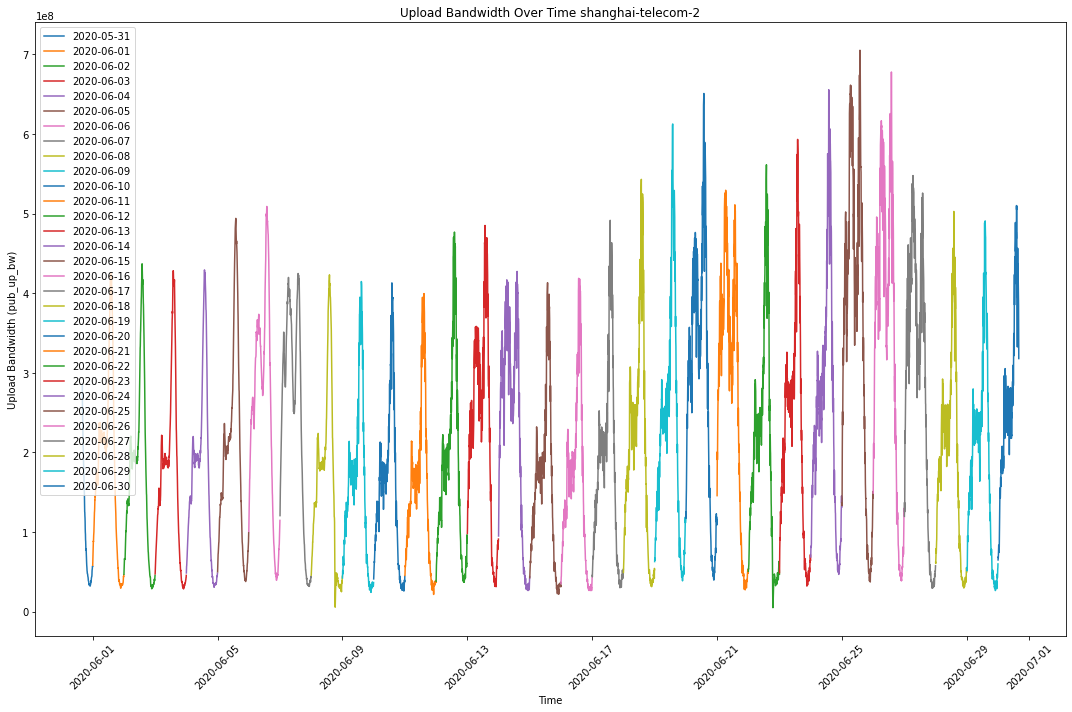

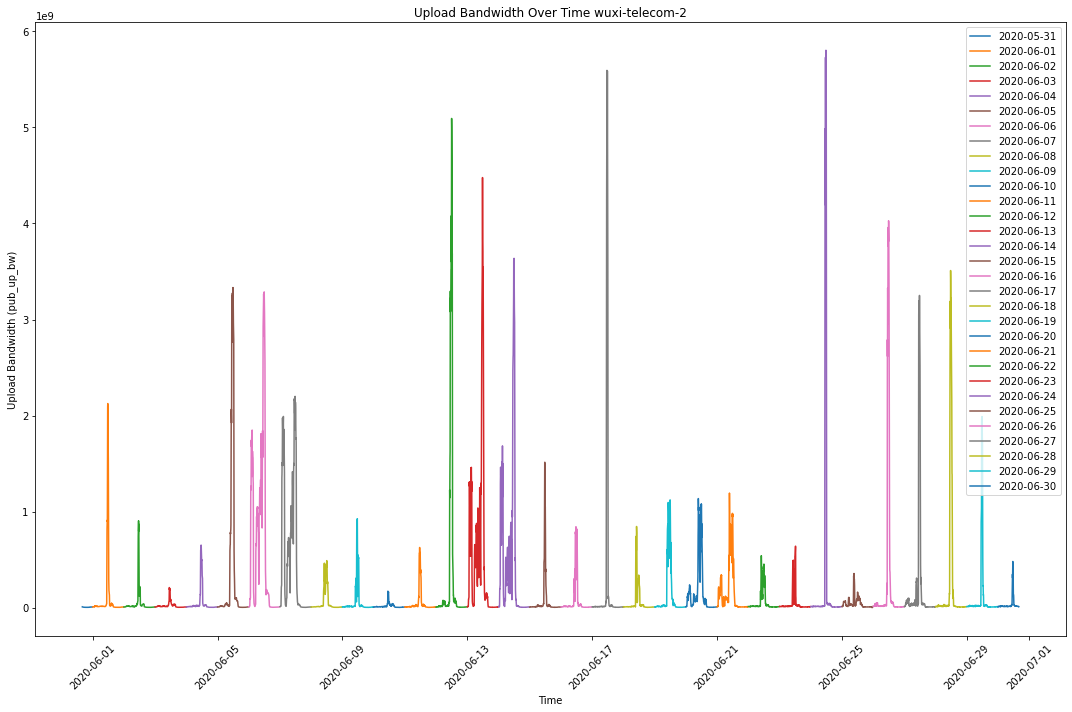

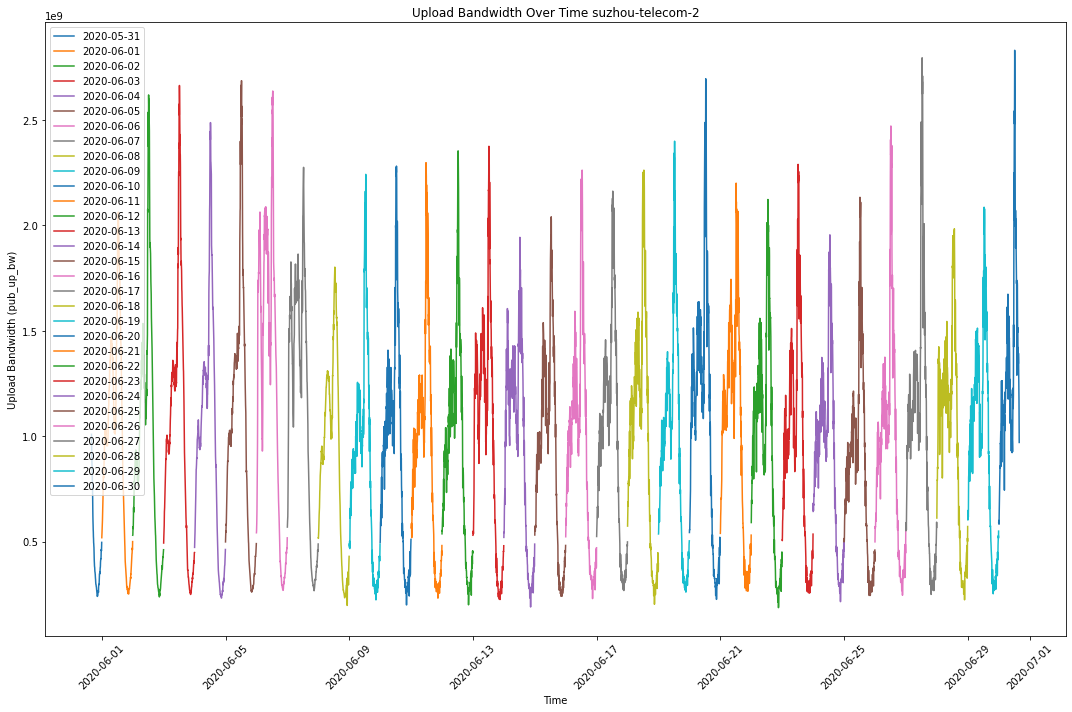

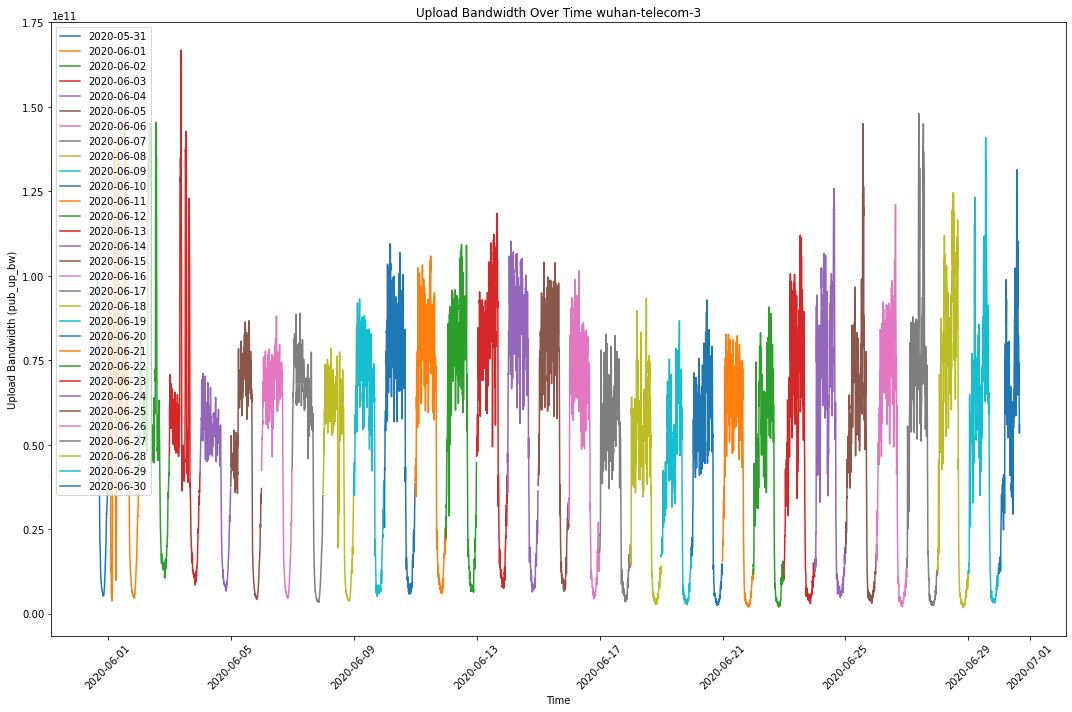

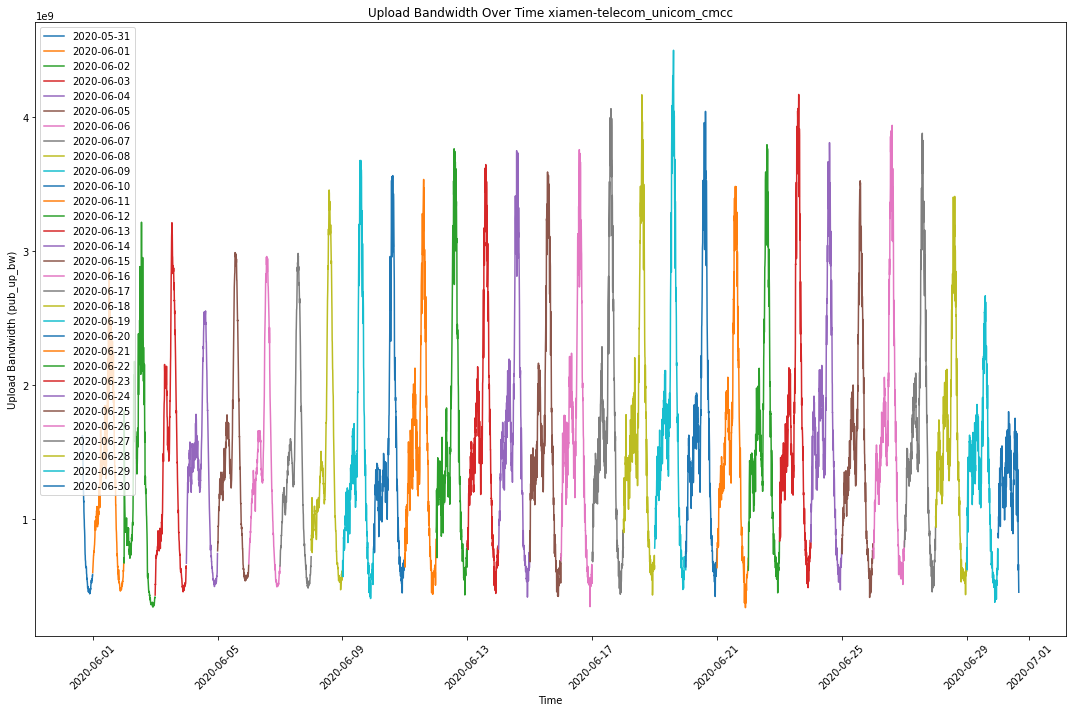

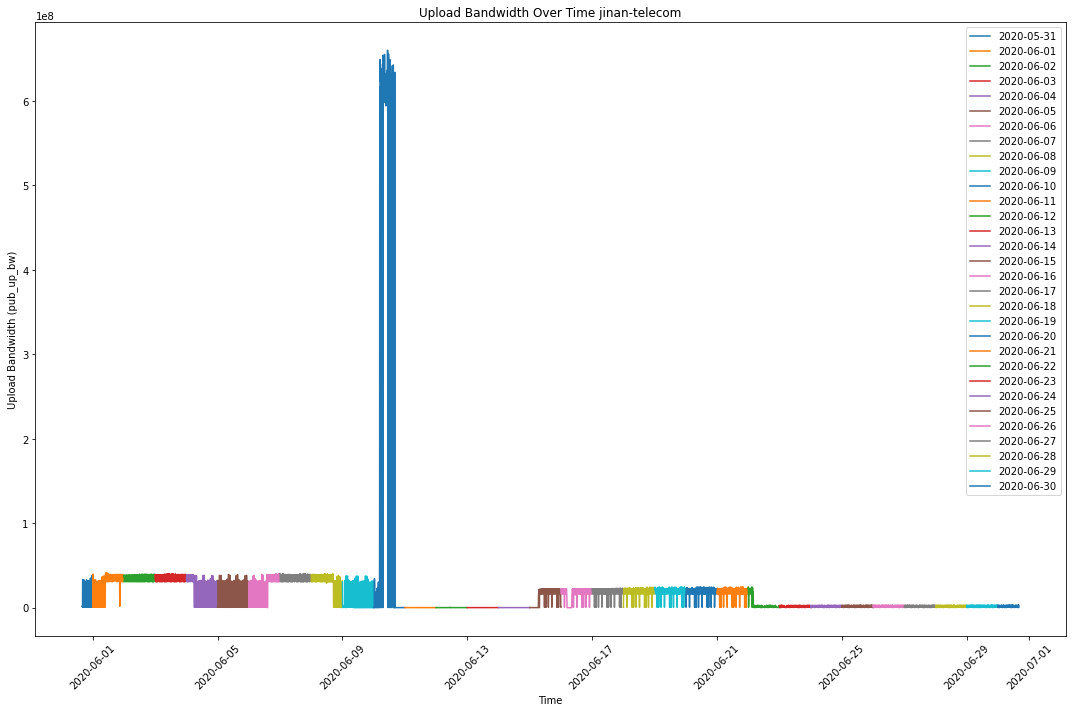

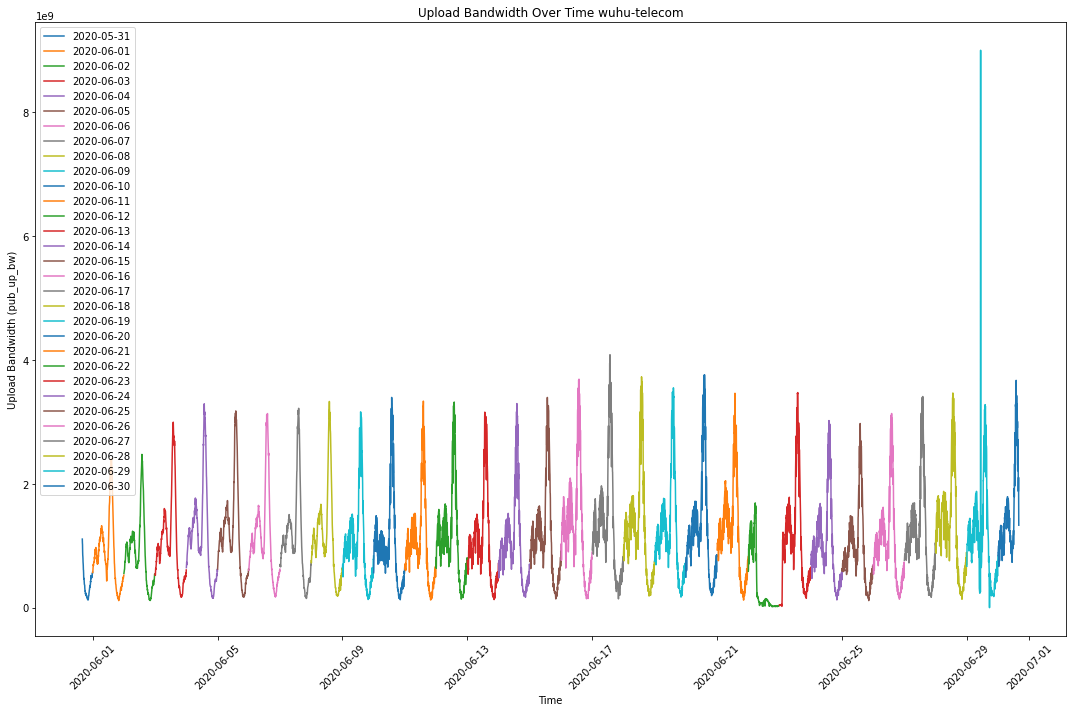

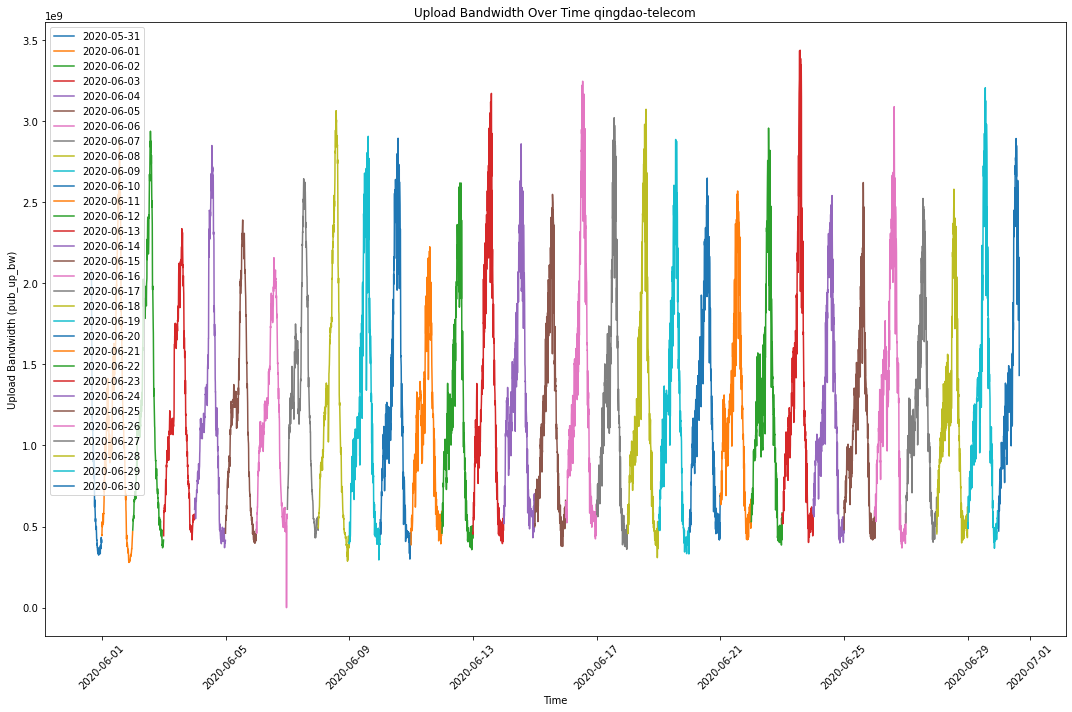

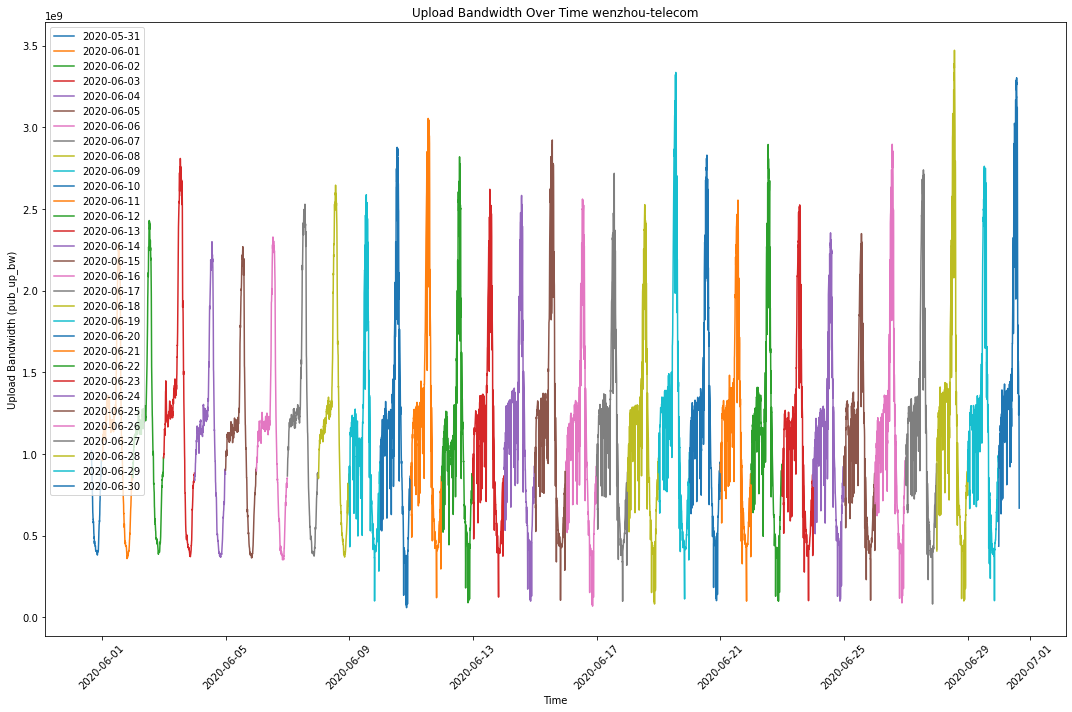

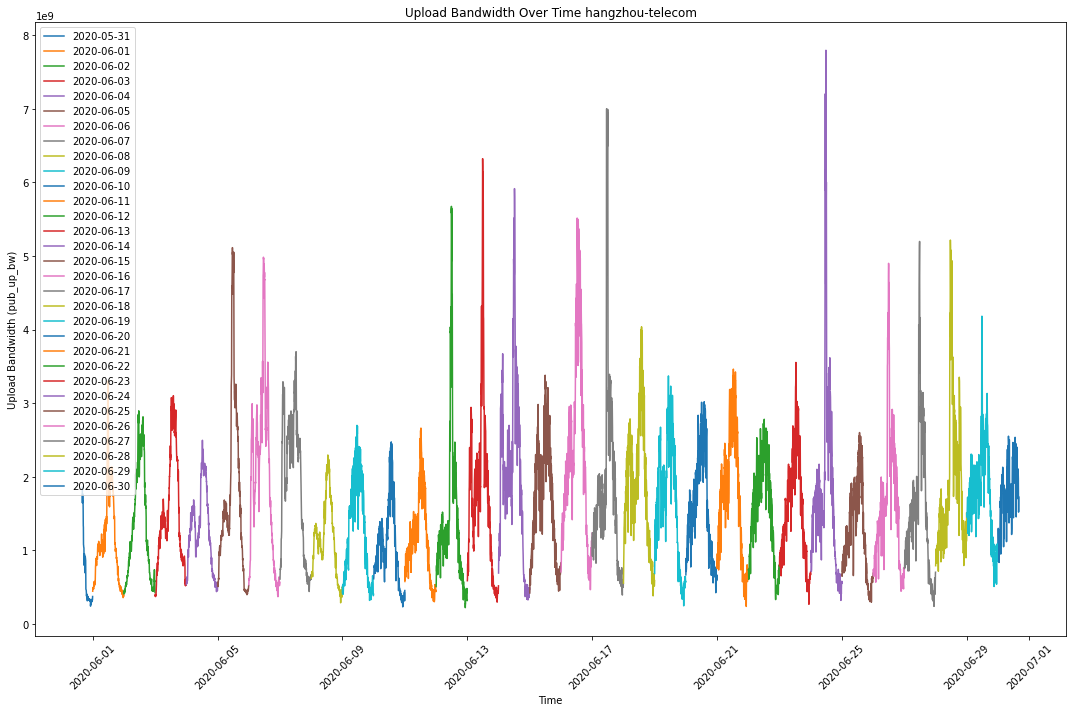

In [65]:
# plot the change of pub_up_bw in one day for each region for each day
region_ids = ['shanghai-telecom-2', 'wuxi-telecom-2', 'suzhou-telecom-2', 'wuhan-telecom-3', 'xiamen-telecom_unicom_cmcc', 'jinan-telecom', 'wuhu-telecom', 'qingdao-telecom', 'wenzhou-telecom', 'hangzhou-telecom']

for region_id in region_ids: 
    df_test = pd.read_csv("../datasets/".rstrip("/") + "/split-vm-files/cleandata/bandwidthup_{}.csv".format(region_id))
    df_test['real_time'] = pd.to_datetime(df_test['real_time'])
    df_test['real_time'] = df_test['real_time'].dt.tz_localize(None)
    df_test['date'] = df_test['real_time'].dt.date
    df_test['time'] = df_test['real_time'].dt.time

    plt.figure(figsize=(15, 10))

    for date, group in df_test.groupby('date'):
        real_time_series = pd.to_datetime(group['real_time']).to_numpy()
        pub_up_bw_series = pd.to_numeric(group['pub_up_bw'], errors='coerce').to_numpy()

        # Print for debugging
        #print(f"Region: {region_id}, Date: {date}")
        #print(group[['real_time', 'pub_up_bw']].head())

        # Plot the data
        plt.plot(real_time_series, pub_up_bw_series, label=str(date))
    
    plt.xlabel('Time')
    plt.ylabel('Upload Bandwidth (pub_up_bw)')
    plt.title('Upload Bandwidth Over Time {}'.format(region_id))
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

In [ ]:
# plot the change of pub_up_bw in one day for each region for each day
region_ids = ['shanghai-telecom-2', 'wuxi-telecom-2', 'suzhou-telecom-2', 'wuhan-telecom-3', 'xiamen-telecom_unicom_cmcc', 'jinan-telecom', 'wuhu-telecom', 'qingdao-telecom', 'wenzhou-telecom', 'hangzhou-telecom']

for region_id in region_ids: 
    f"df_test_{region_id}" = pd.read_csv("../datasets/".rstrip("/") + "/split-vm-files/cleandata/bandwidthup_{}.csv".format(region_id))
    f"df_test_{region_id}"['real_time'] = pd.to_datetime(f"df_test_{region_id}"['real_time'])
    f"df_test_{region_id}"['real_time'] = f"df_test_{region_id}"['real_time'].dt.tz_localize(None)
    f"df_test_{region_id}"['date'] = f"df_test_{region_id}"['real_time'].dt.date
    f"df_test_{region_id}"['time'] = f"df_test_{region_id}"['real_time'].dt.time

    plt.figure(figsize=(15, 10))

    for date, group in df_test.groupby('date'):
        real_time_series = pd.to_datetime(group['real_time']).to_numpy()
        pub_up_bw_series = pd.to_numeric(group['pub_up_bw'], errors='coerce').to_numpy()

        # Print for debugging
        #print(f"Region: {region_id}, Date: {date}")
        #print(group[['real_time', 'pub_up_bw']].head())

        # Plot the data
        plt.plot(real_time_series, pub_up_bw_series, label=str(date))
    
    plt.xlabel('Time')
    plt.ylabel('Upload Bandwidth (pub_up_bw)')
    plt.title('Upload Bandwidth Over Time {}'.format(region_id))
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

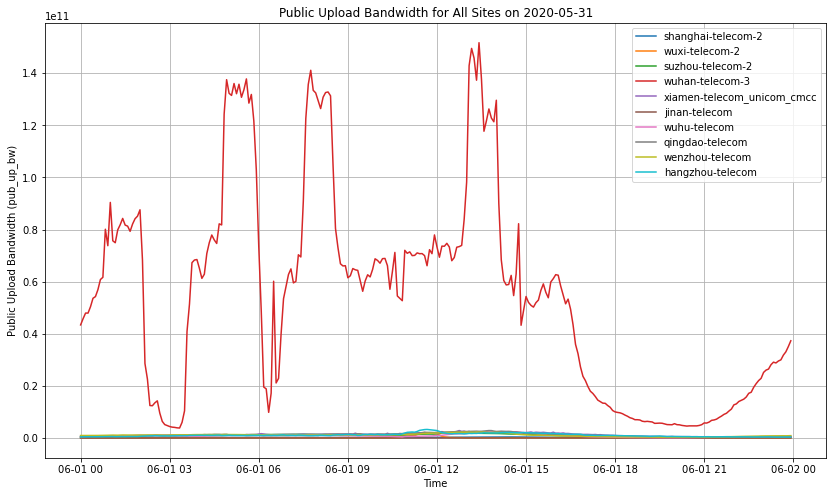

In [78]:
region_ids = ['shanghai-telecom-2', 'wuxi-telecom-2', 'suzhou-telecom-2', 'wuhan-telecom-3', 'xiamen-telecom_unicom_cmcc', 'jinan-telecom', 'wuhu-telecom', 'qingdao-telecom', 'wenzhou-telecom', 'hangzhou-telecom']
dataframes = {}

for region_id in region_ids: 
    df = pd.read_csv(f"../datasets/split-vm-files/cleandata/bandwidthup_{region_id}.csv")
    df['real_time'] = pd.to_datetime(df['real_time'])
    df['real_time'] = df['real_time'].dt.tz_localize(None)
    df['date'] = df['real_time'].dt.date
    df['time'] = df['real_time'].dt.time
    dataframes[region_id] = df

#print(dataframes["df_test_shanghai-telecom-2"])
combined_df = pd.concat(dataframes.values(), keys=dataframes.keys(), names=['region', 'index'])
# Select a specific day
specific_date = pd.Timestamp('2020-06-01') 
daily_df = combined_df[combined_df['date'] == specific_date.date()]

# Plot the data
plt.figure(figsize=(14, 8))

for region_id in region_ids:
    try:
        region_data = daily_df.xs(region_id, level='region')
        
        # Ensure 'real_time' and 'pub_up_bw' are one-dimensional
        if region_data['real_time'].ndim == 1 and region_data['pub_up_bw'].ndim == 1:
            plt.plot(region_data['real_time'].values, region_data['pub_up_bw'].values, label=region_id)
        else:
            print(f"Skipping {region_id} due to multi-dimensional indexing issues.")
    except KeyError:
        print(f"No data for {region_id} on {specific_date.date()}")


plt.xlabel('Time')
plt.ylabel('Public Upload Bandwidth (pub_up_bw)')
plt.title('Public Upload Bandwidth for All Sites on 2020-05-31')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
# extract PM and cores according to the name of city
def split_pm_file(list_site_ids):
    for chunk in pd.read_csv(DATASET_LOCATION.rstrip("/") + "/VM.csv",
                                 usecols=["vm_id", "pm_name", "site_id", "cores", "start_time", "end_time"],
                             chunksize=1000000,
                             dtype={"vm_id": str,
                                    "pm_name": str,
                                    "site_id": str,
                                    "cores": np.int64,
                                    "start_time": str,
                                    "end_time": str,}
                             ):
        df_by_from_site_id = chunk.groupby("site_id")
        for (each_site_id, each_site_id_df) in df_by_from_site_id:
            if any(each_site_id.startswith(city) for city in list_city):
                filename = "../datasets/" + "/split-vm-files/pm.csv"
                each_site_id_df.to_csv(filename, mode='a', header=not os.path.exists(filename))

list_city = ['shanghai', 'wuxi', 'suzhou', 'wuhan', 'xiamen', 'jinan', 'wuhu', 'qingdao', 'wenzhou', 'hangzhou']
split_pm_file(list_city)            

In [41]:
# calculate the number of cores in each city and print it in proportion
list_city = ['shanghai', 'wuxi', 'suzhou', 'wuhan', 'xiamen', 'jinan', 'wuhu', 'qingdao', 'wenzhou', 'hangzhou']
df_test = pd.read_csv("../datasets/".rstrip("/") + "/split-vm-files/pm.csv")
df_test['start_time'] = pd.to_datetime(df_test['start_time'])
df_test['start_time'] = df_test['start_time'].dt.tz_localize(None)
df_test['end_time'] = pd.to_datetime(df_test['end_time'])
df_test['end_time'] = df_test['end_time'].dt.tz_localize(None)

cores_each_city = df_test.groupby("site_id")["cores"].sum()
#print(cores_each_city)

total_cores_by_city = {city: 0 for city in list_city}
total_cores_by_city_proportion = {city: 0 for city in list_city}
for site_id, cores in cores_each_city.items():
    for city in list_city:
        if site_id.startswith(city):
            total_cores_by_city[city] += cores
            break
total_cores = sum(total_cores_by_city.values())

for city, total_cores_city in total_cores_by_city.items():
    total_cores_by_city_proportion[city] = round((total_cores_city / total_cores), 3)
print(total_cores)
print(total_cores_by_city)
print(total_cores_by_city_proportion)

28046
{'shanghai': 8513, 'wuxi': 1832, 'suzhou': 1601, 'wuhan': 5978, 'xiamen': 1649, 'jinan': 2644, 'wuhu': 1043, 'qingdao': 2473, 'wenzhou': 188, 'hangzhou': 2125}
{'shanghai': 0.304, 'wuxi': 0.065, 'suzhou': 0.057, 'wuhan': 0.213, 'xiamen': 0.059, 'jinan': 0.094, 'wuhu': 0.037, 'qingdao': 0.088, 'wenzhou': 0.007, 'hangzhou': 0.076}
